In [2]:
import pandas as pd
df = pd.read_csv('tweets1.csv', engine='python')
df['Date'] = df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [3]:
len(df[df['Date'] > '2022-03-14'])

69416

In [4]:
len(df[df['Date'].dt.strftime('%Y-%m-%d') == '2022-03-16'])

3198

In [5]:
len(df)

197281

In [6]:
df['Date'][0].date()

datetime.date(2022, 4, 26)

In [7]:
filtered_df = df.loc[(df['Date'] >= '2022-03-14')
                     & (df['Date'] < '2022-03-15')]

In [8]:
filtered_df

,Unnamed: 0,Date,Location,User,Tweet
69419,69416,2022-03-14,"Washington, DC",ChadBown,How ending the ethanol mandates will boost the...
69420,69417,2022-03-14,Seattle (for now),DevonHeinen,#BREAKING\nUS State Dept issues stmt saying US...
69421,69418,2022-03-14,"Dublin, Ireland",olivercallan,"Incredible, fearless bravery. Protester storms..."
69422,69419,2022-03-14,NaN,DougJBalloon,Putin invaded Ukraine. So why does it feel lik...
69423,69420,2022-03-14,NaN,1813Doncarlo,Mother Jones journalist David Corn on The Reid...
...,...,...,...,...,...
72149,72145,2022-03-14,Moscow,akarlin0,Biggest casualty of the Ukraine War to date. h...
72150,72146,2022-03-14,"Michigan, USA",AGHamilton29,Kadyrov is taking time away from kidnapping an...
72151,72147,2022-03-14,"ÜT: 52.6906485,-2.7483742",LouWhit15,Money Saving Expert says: don't let the Tories...
72152,72148,2022-03-14,New York City,brianstelter,"Via the NYT: ""They didn't just take away our f..."


In [9]:
df['Tweet'].tolist()

["Paul Adams, the BBC's diplomatic correspondent, blithely dismisses the notion that the war in Ukraine is a proxy war between NATO and Russia.\n\nEven if you don't think that's why it started (imo NATO happily courted this war), it's impossible to deny that's what it has become. https://t.co/9mOKcRWlhu",
 'UK has imported £220 million of Russian oil since Ukraine war outbreak, analysis suggests https://t.co/jeCC1RK70t',
 'Canada will make Russian oligarchs pay for the destruction Putin has caused in Ukraine. Brilliant! https://t.co/tVApQjmuUl',
 '@sahouraxo Where in Ukraine is Damascus located? Asking so I can know if I should care or how I should feel.',
 "The world's top nuclear monitor warned that while Ukraine has regained control over the Chornobyl power plant, there's a need for ongoing vigilance at the infamous facility amid the war. https://t.co/YlStlL2faw",
 '📌Some Good News from Ukraine for your Tuesday \n\nHow the H*ll did Putin think he could ever defeat the Ukrainian peop

In [10]:
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2022-04-28 07:19:16.810912: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-28 07:19:16.810927: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-04-28 07:19:18,911 loading file /home/aditya/.flair/models/sentiment-en-mix-distillbert_4.pt


In [11]:
import numpy as np

def process(data_al):
    ss= [flair.data.Sentence(sent) for sent in data_al]
    flair_sentiment.predict(ss, mini_batch_size=32)
    results = [(x.labels[0].value, x.labels[0].score) for x in ss]
    pos = np.sum([s for v, s in results if v == 'POSITIVE'])
    neg = np.sum([s for v, s in results if v == 'NEGATIVE'])
    return [pos, neg]

In [12]:
process(df[:10]['Tweet']), process(df[10:20]['Tweet'])

([1.9774629473686218, 6.566019058227539],
 [3.9135547280311584, 4.875959694385529])

In [13]:
from datetime import date, timedelta
from tqdm import tqdm
data_dict={}
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2022, 2, 14)
end_date = date(2022, 3, 30)
for single_date in tqdm(list(daterange(start_date, end_date))):
    data = df[df['Date'].dt.strftime('%Y-%m-%d') == str(single_date)]['Tweet'].tolist()
    data_dict[single_date] = process(data)

100%|██████████| 44/44 [1:53:59<00:00, 155.45s/it]  


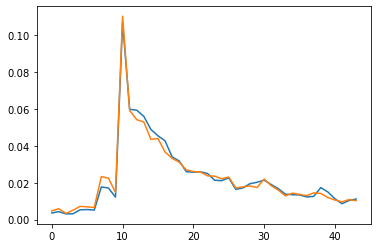

In [32]:
import pandas as pd
from matplotlib import pyplot as plt

plt.plot(pos)
plt.plot(neg)
# plt.plot(np.asarray(overall_sentiment)[:,2])
 
plt.show()

In [15]:
start_date = date(2022, 2, 24)
end_date = date(2022, 3, 30)
overall_sentiment=[]
for single_date in daterange(start_date, end_date):
    overall_sentiment.append(np.mean(np.asarray(data_dict[single_date]),axis=0))
    
    

In [24]:
import pickle
pickle.dump(data_dict, open("results.pkl", "wb"))

In [26]:
results = pickle.load(open("results.pkl", "rb"))

In [27]:
print(results)

{datetime.date(2022, 2, 14): [118.92903101444244, 480.27956503629684], datetime.date(2022, 2, 15): [142.4405256509781, 599.0187214612961], datetime.date(2022, 2, 16): [101.95544213056564, 343.8515884876251], datetime.date(2022, 2, 17): [105.1399478316307, 517.3941519856453], datetime.date(2022, 2, 18): [174.9147551059723, 726.3308876752853], datetime.date(2022, 2, 19): [179.69282245635986, 701.1327049732208], datetime.date(2022, 2, 20): [170.4328629374504, 664.9886829853058], datetime.date(2022, 2, 21): [583.5762755274773, 2362.7755559682846], datetime.date(2022, 2, 22): [564.8048428893089, 2275.9253261089325], datetime.date(2022, 2, 23): [401.955677986145, 1491.6147342920303], datetime.date(2022, 2, 24): [3525.972750246525, 11154.216434895992], datetime.date(2022, 2, 25): [1970.1252047419548, 5986.278903961182], datetime.date(2022, 2, 26): [1953.9691108465195, 5482.120938539505], datetime.date(2022, 2, 27): [1844.9105245471, 5356.568440556526], datetime.date(2022, 2, 28): [1610.290307

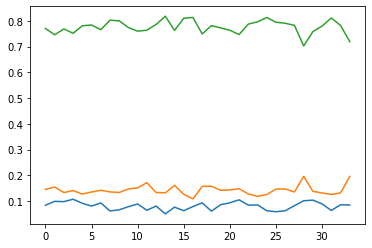

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

plt.plot(np.asarray(overall_sentiment)[:,0])
plt.plot(np.asarray(overall_sentiment)[:,1])
plt.plot(np.asarray(overall_sentiment)[:,2])
 
plt.show()

In [ ]:
start_date = date(2022, 2, 24)
end_date = date(2022, 3, 30)
overall_sentiment=[]
count = 0
for single_date in daterange(start_date, end_date):
    count+=1

In [ ]:
count

34

In [ ]:
a=np.asarray(overall_sentiment)[:,2]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
overall_sentiment

[array([0.08409174, 0.14577064, 0.77041284]),
 array([0.09937255, 0.15511765, 0.74554902]),
 array([0.09811364, 0.13331818, 0.76852273]),
 array([0.10745, 0.1412 , 0.7514 ]),
 array([0.09176471, 0.12767647, 0.78064706]),
 array([0.08083871, 0.13554839, 0.78370968]),
 array([0.0931    , 0.14223333, 0.76536667]),
 array([0.062     , 0.13596154, 0.80223077]),
 array([0.06633333, 0.13366667, 0.7997619 ]),
 array([0.07864706, 0.14758824, 0.77376471]),
 array([0.08905, 0.1514 , 0.7597 ]),
 array([0.06461111, 0.17188889, 0.7635    ]),
 array([0.081     , 0.13378947, 0.78563158]),
 array([0.0505   , 0.1320625, 0.817625 ]),
 array([0.07676471, 0.16117647, 0.76258824]),
 array([0.06305882, 0.12664706, 0.80964706]),
 array([0.07913333, 0.10886667, 0.813     ]),
 array([0.09335714, 0.1575    , 0.749     ]),
 array([0.06111765, 0.15782353, 0.78141176]),
 array([0.08630769, 0.14230769, 0.77230769]),
 array([0.09370588, 0.14347059, 0.76323529]),
 array([0.10515385, 0.14846154, 0.74669231]),
 array([0

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sharathchandra/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sid.polarity_scores("This is not bad")

{'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.431}

In [ ]:
# !pip3 install flair
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
s = flair.data.Sentence("This is not bad")
flair_sentiment.predict(s)
total_sentiment = s.labels



ImportError: cannot import name 'SAVE_STATE_WARNING' from 'torch.optim.lr_scheduler' (/Users/sharathchandra/opt/anaconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py)

In [ ]:
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')
s = flair.data.Sentence("This is not bad")
flair_sentiment.predict(s)
total_sentiment = s.labels
print(total_sentiment)

NameError: name 'flair' is not defined

In [ ]:
!pip install -q torch==1.4.0 -f https://download.pytorch.org/whl/cu101/torch_stable.html


In [ ]:
!pip install transformers

In [ ]:
pip upgarde torch

ERROR: unknown command "upgarde"
Note: you may need to restart the kernel to use updated packages.


In [ ]:
0.11.1

In [ ]:
20000%10000==0

True

In [17]:
import datetime
res={datetime.date(2022, 2, 14): [118.92903101444244, 480.27956503629684],
 datetime.date(2022, 2, 15): [142.4405256509781, 599.0187214612961],
 datetime.date(2022, 2, 16): [101.95544213056564, 343.8515884876251],
 datetime.date(2022, 2, 17): [105.1399478316307, 517.3941519856453],
 datetime.date(2022, 2, 18): [174.9147551059723, 726.3308876752853],
 datetime.date(2022, 2, 19): [179.69282245635986, 701.1327049732208],
 datetime.date(2022, 2, 20): [170.4328629374504, 664.9886829853058],
 datetime.date(2022, 2, 21): [583.5762755274773, 2362.7755559682846],
 datetime.date(2022, 2, 22): [564.8048428893089, 2275.9253261089325],
 datetime.date(2022, 2, 23): [401.955677986145, 1491.6147342920303],
 datetime.date(2022, 2, 24): [3525.972750246525, 11154.216434895992],
 datetime.date(2022, 2, 25): [1970.1252047419548, 5986.278903961182],
 datetime.date(2022, 2, 26): [1953.9691108465195, 5482.120938539505],
 datetime.date(2022, 2, 27): [1844.9105245471, 5356.568440556526],
 datetime.date(2022, 2, 28): [1610.2903074026108, 4405.019297301769],
 datetime.date(2022, 3, 1): [1496.9190143942833, 4447.503445148468],
 datetime.date(2022, 3, 2): [1407.2760680913925, 3709.281339287758],
 datetime.date(2022, 3, 3): [1119.6053068041801, 3361.886091530323],
 datetime.date(2022, 3, 4): [1047.8193479776382, 3150.080645442009],
 datetime.date(2022, 3, 5): [855.52467918396, 2731.5326642990112],
 datetime.date(2022, 3, 6): [847.5660935640335, 2637.9051345586777],
 datetime.date(2022, 3, 7): [853.8274075984955, 2614.077713370323],
 datetime.date(2022, 3, 8): [823.7854553461075, 2400.6587977409363],
 datetime.date(2022, 3, 9): [704.3173249959946, 2383.6860756874084],
 datetime.date(2022, 3, 10): [695.3505412936211, 2242.3317826986313],
 datetime.date(2022, 3, 11): [745.9762434959412, 2335.204441547394],
 datetime.date(2022, 3, 12): [539.1668545603752, 1738.6688316464424],
 datetime.date(2022, 3, 13): [565.9402373433113, 1797.7504935860634],
 datetime.date(2022, 3, 14): [641.7593858242035, 1847.335353255272],
 datetime.date(2022, 3, 15): [666.7556861042976, 1761.6112011671066],
 datetime.date(2022, 3, 16): [705.4311959147453, 2223.603035092354],
 datetime.date(2022, 3, 17): [626.2880187630653, 1858.8803781867027],
 datetime.date(2022, 3, 18): [552.6230125427246, 1619.8915224671364],
 datetime.date(2022, 3, 19): [455.6877233982086, 1302.8774873018265],
 datetime.date(2022, 3, 20): [444.76520586013794, 1453.9968869686127],
 datetime.date(2022, 3, 21): [441.14719170331955, 1385.4624593257904],
 datetime.date(2022, 3, 22): [405.2056667804718, 1311.2369463443756],
 datetime.date(2022, 3, 23): [414.8027781844139, 1467.3989069461823],
 datetime.date(2022, 3, 24): [571.9637108445168, 1437.4258672595024],
 datetime.date(2022, 3, 25): [494.30556386709213, 1212.7611320614815],
 datetime.date(2022, 3, 26): [372.3832086920738, 1074.2619965672493],
 datetime.date(2022, 3, 27): [283.89652466773987, 976.6274518370628],
 datetime.date(2022, 3, 28): [341.6678057909012, 1097.647948563099],
 datetime.date(2022, 3, 29): [367.85573744773865, 1039.85893201828]}

In [18]:
res

{datetime.date(2022, 2, 14): [118.92903101444244, 480.27956503629684],
 datetime.date(2022, 2, 15): [142.4405256509781, 599.0187214612961],
 datetime.date(2022, 2, 16): [101.95544213056564, 343.8515884876251],
 datetime.date(2022, 2, 17): [105.1399478316307, 517.3941519856453],
 datetime.date(2022, 2, 18): [174.9147551059723, 726.3308876752853],
 datetime.date(2022, 2, 19): [179.69282245635986, 701.1327049732208],
 datetime.date(2022, 2, 20): [170.4328629374504, 664.9886829853058],
 datetime.date(2022, 2, 21): [583.5762755274773, 2362.7755559682846],
 datetime.date(2022, 2, 22): [564.8048428893089, 2275.9253261089325],
 datetime.date(2022, 2, 23): [401.955677986145, 1491.6147342920303],
 datetime.date(2022, 2, 24): [3525.972750246525, 11154.216434895992],
 datetime.date(2022, 2, 25): [1970.1252047419548, 5986.278903961182],
 datetime.date(2022, 2, 26): [1953.9691108465195, 5482.120938539505],
 datetime.date(2022, 2, 27): [1844.9105245471, 5356.568440556526],
 datetime.date(2022, 2, 28)

In [30]:
from datetime import date, timedelta
from tqdm import tqdm
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)
start_date = date(2022, 2, 14)
end_date = date(2022, 3, 30)
pos=[]
neg=[]
for single_date in tqdm(list(daterange(start_date, end_date))):
    pos.append(res[single_date][0])
    neg.append(res[single_date][1])
sum_pos=sum(pos)
sum_neg=sum(neg)
pos = [x / sum_pos for x in pos]
neg = [x / sum_neg for x in neg]

100%|██████████| 44/44 [00:00<00:00, 524288.00it/s]


In [31]:
pos

[0.0036106144962940547,
 0.004324409459896395,
 0.003095306454552599,
 0.0031919861495750892,
 0.005310307710525736,
 0.005455366987410651,
 0.005174240135632884,
 0.017717027895879565,
 0.017147138389327146,
 0.012203134805901489,
 0.1070464311109363,
 0.0598118269616757,
 0.05932133758053156,
 0.05601038390270161,
 0.04888745395095014,
 0.04544556906794156,
 0.04272406264809676,
 0.03399054979590323,
 0.031811170872535016,
 0.02597321934140546,
 0.02573160142554256,
 0.02592169118769603,
 0.025009635423226935,
 0.021382654192421455,
 0.021110427983692052,
 0.022647394128102707,
 0.016368784344678245,
 0.017181608288221177,
 0.01948343244559228,
 0.02024230522354392,
 0.021416470649613925,
 0.019013730963019466,
 0.016777305280744677,
 0.013834407678685323,
 0.013502806556380755,
 0.013392965803025762,
 0.012301802528605498,
 0.012593165110660122,
 0.017364477353545137,
 0.015006822297918112,
 0.01130533226422083,
 0.008618929277985674,
 0.010372830939451618,
 0.011167880935752796]

TypeError: unsupported operand type(s) for /: 'list' and 'int'